# Example - using the unofficial ONS Geoportal
This unofficial ONS Geoportal allows users to query, retrieve and store geometry and attribute information from the ONS Open Geography Portal as geopandas.GeoDataFrames.

This repository is not perfect and it does habr some qwerks.
For example, if you manually view individual Output Areas (OA) on the Open Geography portable, the names and codes of Local Authority Districts (LADs) for 2016 are linked.
However, the API only allows queries for LAD codes for 2011.
I will later update this to allow any types of SQL query, using look up tables.

Below is an example using ons_geoportal to retrieve the local authority of Bristol as a GeoPandas.GeoDataFrame using a SQL query.
I use an [SQL wildcard](https://www.w3schools.com/sql/sql_wildcards.asp) for msoa and lsoas, to get multiple zones that follow a similar character structure.

In [1]:
from ons_geoportal.api import get_boundaries

/home/ik19962/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
lad = get_boundaries(geom_type="lad", cols=["lad18cd", "lad18nm"], where="LAD18NM = 'Bristol, City of'")
lad.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
 1   lad18cd   1 non-null      object  
 2   lad18nm   1 non-null      object  
dtypes: geometry(1), object(2)
memory usage: 152.0+ bytes


In [3]:
msoa = get_boundaries(geom_type="msoa", cols=["msoa11cd", "msoa11nm"], where="msoa11nm LIKE 'Bristol%'")
msoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  55 non-null     geometry
 1   msoa11cd  55 non-null     object  
 2   msoa11nm  55 non-null     object  
dtypes: geometry(1), object(2)
memory usage: 1.4+ KB


In [4]:
lsoa = get_boundaries(geom_type="lsoa", cols=["lsoa11cd", "lsoa11nm"], where="lsoa11nm LIKE 'Bristol%'")
lsoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  200 non-null    geometry
 1   lsoa11cd  200 non-null    object  
 2   lsoa11nm  200 non-null    object  
dtypes: geometry(1), object(2)
memory usage: 4.8+ KB


In [5]:
oa = get_boundaries(geom_type="oa", where="lad11cd = 'E06000023'")
oa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          200 non-null    geometry
 1   objectid          200 non-null    int64   
 2   oa11cd            200 non-null    object  
 3   lad11cd           200 non-null    object  
 4   st_area(shape)    200 non-null    float64 
 5   st_length(shape)  200 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 9.5+ KB


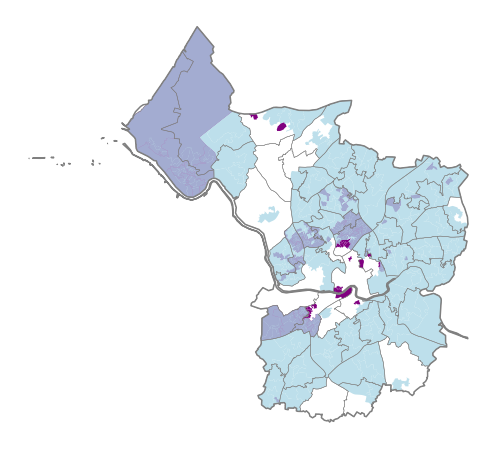

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(15,8))
oa.plot(ax=ax, facecolor="purple", edgecolor="none", alpha=1)

lsoa.plot(ax=ax, facecolor="lightblue", edgecolor="none", alpha=0.8)
msoa.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=0.5)
lad.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=1.5)
ax.set_axis_off()
plt.show()

One limitation of making requests to the Geography Open Portal is the API limits.
The datasets available on the portal have different API response limits.
For example, the LSOA and OA boundary dataset above have a 2000 limit, which means not all boundaries are retrieved.
Similarly, just 2000 lsoa codes and names are retrieved for England and Wales below.
I will later update this repository to include a dictionary of boundary codes/names, which will allow me to request all boundaries for a place through chunking.

In [7]:
from requests import get
import pandas as pd
query = "https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/LSOA_2011_EW_NC/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
response = get(
        url=query)

df = pd.json_normalize(response.json()["features"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   attributes.LSOA11CD  2000 non-null   object
 1   attributes.LSOA11NM  2000 non-null   object
 2   attributes.FID       2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB
